In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
params = {"ytick.color" : "c",
          "xtick.color" : "c",
          "axes.labelcolor" : "c",
          "axes.edgecolor" : "c",
         "text.color" : "c"}
plt.rcParams.update(params)
import tqdm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [3]:
from sklearn import datasets
iris = datasets.load_iris()
#iris.data 
from scipy.spatial import distance_matrix


Zadanie 0. (2 punkty)<br>
Zaimplementuj algorytm K-Means. Postaraj się, żeby implementacja była efektywna, bo będzie on
w przyszłości używany do przetwarzania dużych zbiorów danych. Sprawdź działanie
zaimplementowanego algorytmu na danych IRIS.

In [4]:
#losowanie punktow clusterow
def rand_centr(N,k,data):
    centrs = random.sample(range(N),k)
    return data[centrs]
#macierz odleglosci
def matrix_distances(data, centroids):
    #return (-2 * np.dot(data, centroids.T) + np.sum(centroids ** 2, axis=1) 
     #   + np.sum(data**2,axis=1)[:, np.newaxis]) 
        #bez X**2 - przyspieszenie obliczen
    return -2 * np.dot(data, centroids.T) + np.sum(centroids ** 2, axis=1)
#przypisanie do clusterow
def assignement(data,centroids, indexes): 
    selected_centroid = np.argmin( matrix_distances(data, centroids), axis=1)
    if np.sum(selected_centroid - indexes) == 0: #gdy brak zmiany 
        return False
    #print(selected_centroid)
    indexes[:]=selected_centroid[:] #nowe najblizsze pkt
    return True
#new centroids
def update(k, M, indexes, data, centroids):
    new_centroids = np.zeros((k,M))
    how_many = np.zeros(k)
    for i in range(k): #k grup, k male , mozna forem
        assigned_to = indexes == i #wyrzuca czy nalezy do clustera czy nie
        #print(assigned_to)
        new_centroids[i] += np.sum(data[assigned_to], axis=0) #suma odleglosci 
        how_many[i] += len(data[assigned_to]) #ile nalezy
       # print(new_centroids)
        #print(how_many)
    centroids[:] = new_centroids[:]/how_many[:, np.newaxis]#nowe srodki
   # print(centroids)

In [5]:
def plot1(data, indexes, cent):#wykres 2d
    #plt.figure(dpi=80) #opcjonalnie wykres przed
    #plt.scatter(data[:,0], data[:,1], c='black', edgecolor='black')
    #plt.show()
    plt.figure(dpi=100)
    plt.scatter(data[:,0], data[:,1], c=indexes, edgecolor='black',s=15)
    plt.scatter(cent[:,0], cent[:,1], marker='o', s=130, c='None',edgecolor='red')
    plt.title("kmeans")
    plt.show()
    
def plot3d(df, centroids, indexes, k):
    #fig = plt.figure(figsize=(20, 8))
    fig = plt.figure(figsize=(15,8))
    ax2 = Axes3D(fig)
    #ax2 = fig.add_subplot(121, projection='3d')
    ax2.scatter(df[:, 0], df[:, 1], df[:, 2], c=indexes, s=20, alpha=1)
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],  c=range(k), edgecolor='red', s=100, alpha=0.8)


In [6]:
def Kmeans(data,k):   
    no_iter = 40
    N=data.shape[0] #number of training examples
    M=data.shape[1] #number of features.
    centroids = rand_centr(N,k,data)
    indexes = np.zeros(N, dtype=np.int)
    #print("wylosowane pierwsze punkty\n",centroids)
    #print("maceirz dist",matrix_distances(data, first_centroids))
    for i in range(no_iter):
        if not assignement(data, centroids, indexes):#dopoki jest zmiana srodkow
            break
        #print(indexes)#przypisanie do centroidow
        update(k, M, indexes, data, centroids)
   # print("znalezione",centroids)
    plot1(data, indexes, centroids)

In [7]:
def Kmeans3D(data,k):   
    no_iter = 100
    N=data.shape[0] #number of training examples
    M=data.shape[1] #number of features
    centroids = rand_centr(N,k,data)
    indexes = np.zeros(N, dtype=np.int)
    #print("maceirz dist",matrix_distances(data, first_centroids))
    for i in range(no_iter):
    
        if not assignement(data, centroids, indexes):
            break
        #print(indexes)#przypisanie do centroidow
        update(k, M, indexes, data, centroids)
 #   print("znalezione",centroids)
    plot3d(data, centroids, indexes, k)

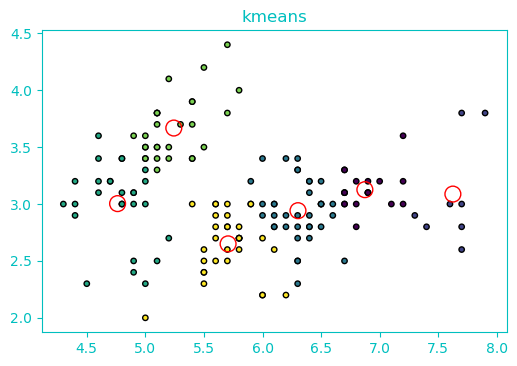

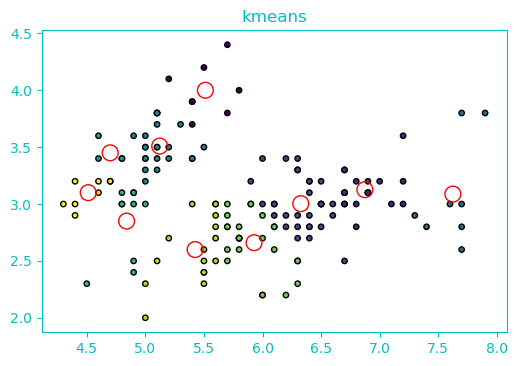

In [8]:
#%%timeit #dla iris okolo 6ms
Kmeans(iris.data[:,0:2], 6)
Kmeans(iris.data[:,0:2], 10)

Zadanie 1. (1 punkt)<br>
Napisz program, który generuje zbiór N = 5000 losowych wektorów danych z mieszaniny
rozkładów gaussowskich o niżej podanych parametrach i sprawdź działanie algorytmu K-Means na
tym zbiorze (rozkład Choleskiego macierzy kowariancji można w Matlabie uzyskać poleceniem
chol, a w Pythonie poleceniem cholesky).<br>
a) d = 2, K = 5, p = 1/K * 1, μ k = 3k * 1, Σ k = I (dla k = 1, 2, ..., K),<br>
b) jak w a), oprócz Σ 3 = [3 0; 0 1<br>
c) jak w b), oprócz Σ 1 = [3 1; 1 1<br>
d) jak w c), oprócz p = [0.2; 0.1; 0.3; 0.1; 0.3],<br>
e) jak w a), oprócz d = 3 i Σ 3 = [3 1 0; 1 1 0; 0 0 1],<br>
f) jak w a), oprócz d = 100 i K = 10.<br>
(1 to wektor odpowiedniej długości złożony z samych jedynek, I to macierz identycznościowa).
Jak pogrupowałbyś te dane, jeśli nie znałbyś wartości K użytej w generatorze?

In [9]:
def generate(N, d, K, p, Mu, sigma):
    ''' wszystkie zmienne
    N - ilosc wektorow
    d - wymiar wektorow danych
    K - wymiar rozkladu gaussowskiego
    p - weights - P poszczegolnych rozkladow 
    Mu - mean - lokacja
    sigma - wariancja
    '''
    points = random.choices(range(K), k=N, weights=p) #N elementow z K(population)
    res_rand = np.random.randn(N, d)
    
    cholesky_L = np.linalg.cholesky(sigma) #funkcja biblioteczna - dolna macierz trojkatna
    
    for i in range(N):#czy mozna macierzowo?
        res_rand[i, :] = (Mu[points[i], :] + 
            np.dot(cholesky_L[points[i], :, :], res_rand[i, :]))
    return np.array(res_rand)

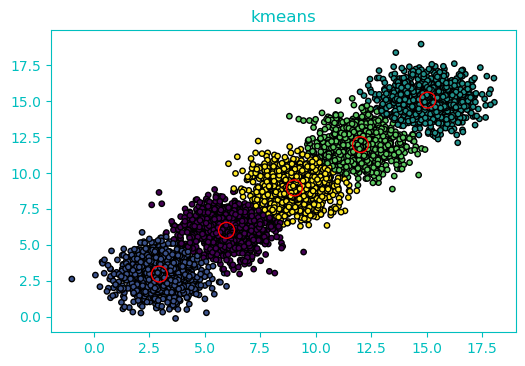

In [10]:
# a
N, d, K = 5000, 2, 5
p = np.ones(K) / K
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
X = generate(N, d, K, p, Mu, Sigma)
Kmeans(X,K)

(5, 2, 2)


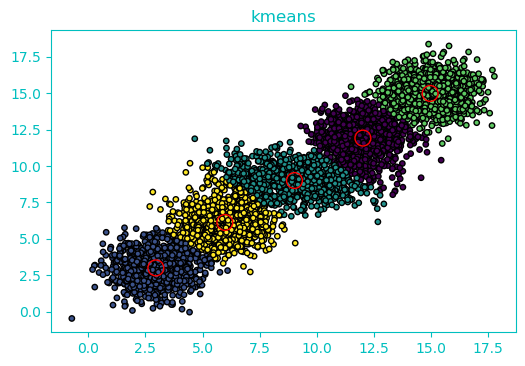

In [11]:
# b
N, d, K = 5000, 2, 5
p = np.ones(K) / K
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
print(Sigma.shape)
Sigma[2] = np.array([[3,0],[0,1]])
X = generate(N, d, K, p, Mu, Sigma)
Kmeans(X,K)

(5, 2, 2)


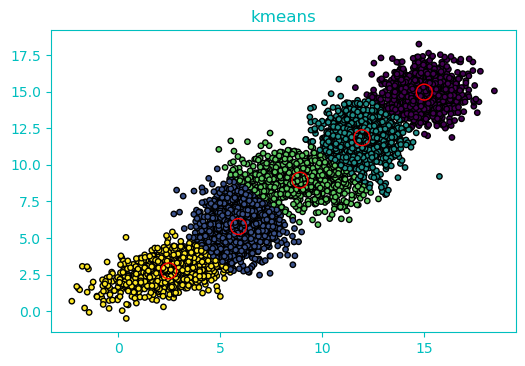

In [12]:
# c
N, d, K = 5000, 2, 5
p = np.ones(K) / K
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
print(Sigma.shape)
Sigma[2] = np.array([[3,0],[0,1]])
Sigma[0] = np.array([[3,1],[1,1]])

X = generate(N, d, K, p, Mu, Sigma)
Kmeans(X,K)

(5, 2, 2)


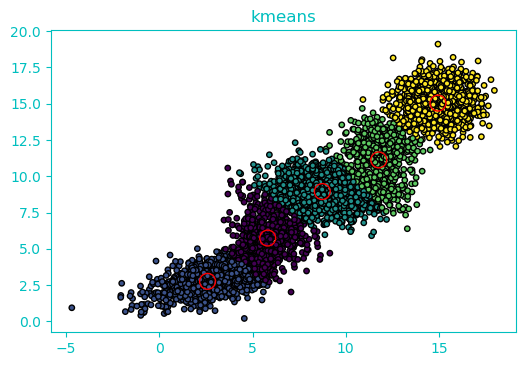

In [13]:
#d
N, d, K = 5000, 2, 5
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
print(Sigma.shape)
Sigma[2] = np.array([[3,0],[0,1]])
Sigma[0] = np.array([[3,1],[1,1]])

X = generate(N, d, K, p, Mu, Sigma)
Kmeans(X,K)

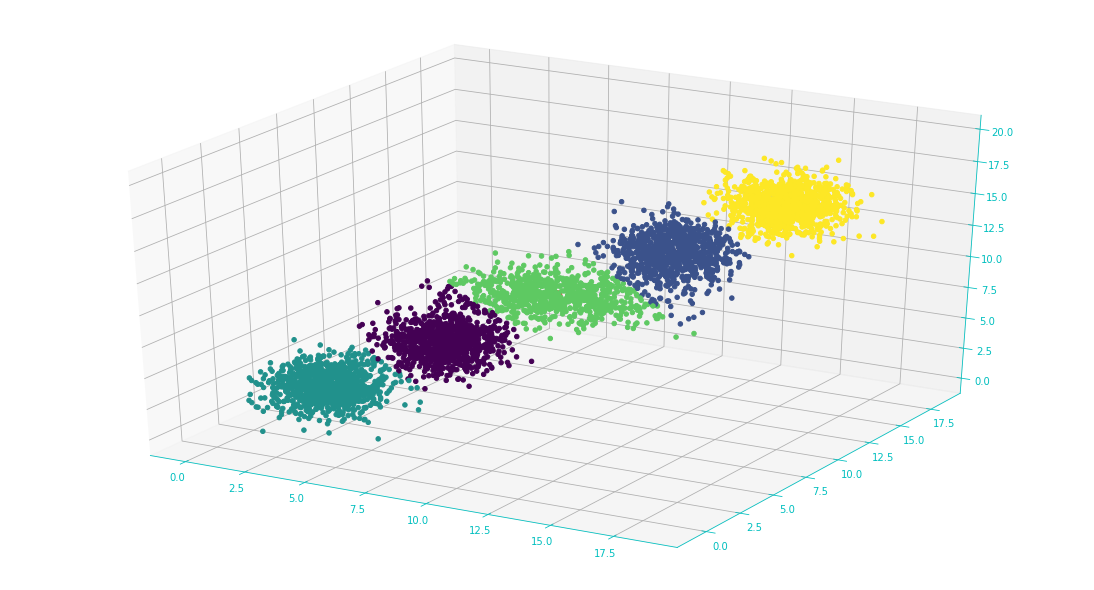

In [15]:
# e
N, d, K = 5000, 3, 5
p = np.ones(K) / K
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
Sigma[2] = np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])
X = generate(N, d, K, p, Mu, Sigma)
Kmeans3D(X,K)

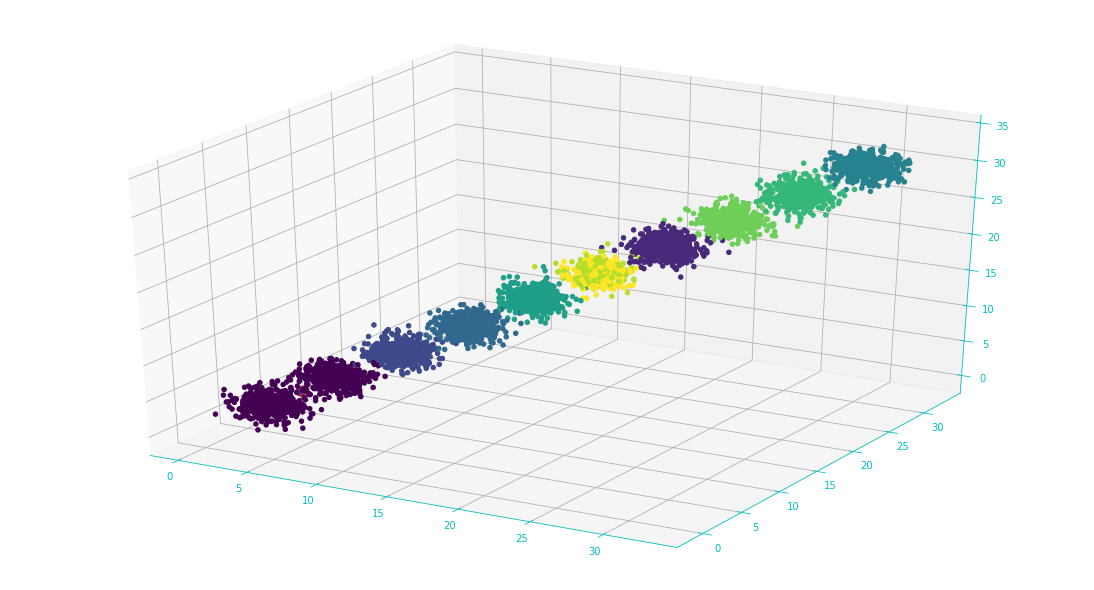

In [44]:
# f
N, d, K = 5000, 100, 10
p = np.ones(K) / K
Mu = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)
X = generate(N, d, K, p, Mu, Sigma)
Kmeans3D(X,K) #3d bo ladnie rysuje
#za malo danych w stosunku do liczby, chmury sie mieszaja

Zadanie 2. (1 punkt)<br>
Wygeneruj zbiór N = 1000000 losowych danych z d = 1000 wymiarowej mieszaniny K = 1000
rozkładów gaussowskich takiej, że odległość między środkami μ k każdych dwóch rozkładów tej
mieszaniny jest nie mniejsza niż q = 10. Prawdopodobieństwa wyboru rozkładów mogą być równe,
p = 1/K * 1, a same rozkłady mogą mieć nieskorelowane zmienne, Σ k = I. Sprawdź działanie
algorytmu K-Means na tym zbiorze. Poeksperymentuj z innymi wartościami parametru q.

/home/oskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/oskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


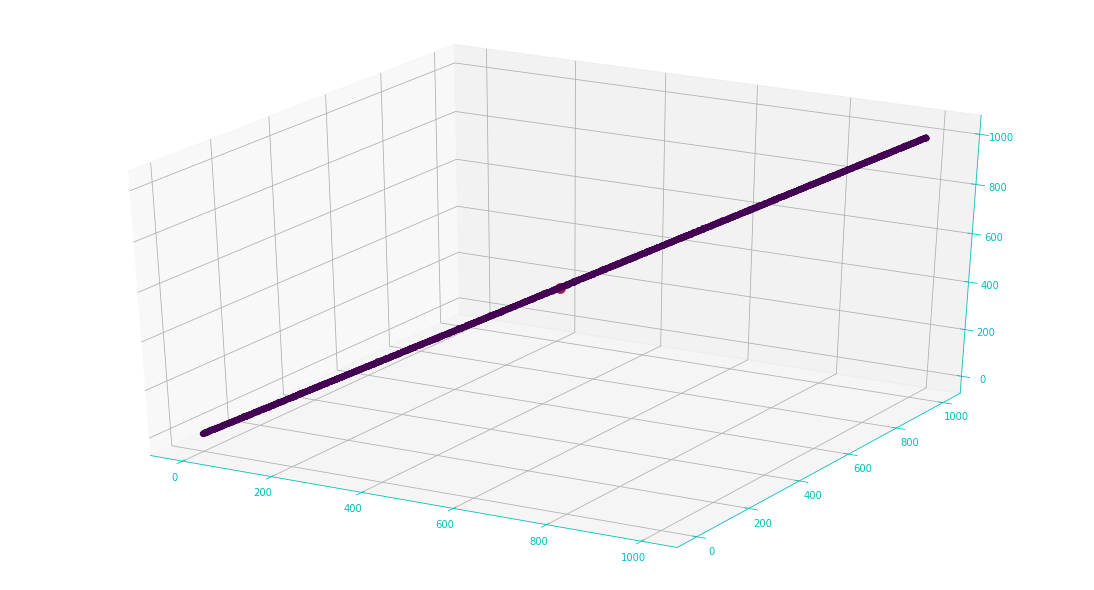

In [17]:
N, d, K = 10000, 100, 1000
p = np.ones(K) / K
q = 1
Mu = q * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)

X = generate(N, d, K, p, Mu, Sigma)
#Kmeans(X,K)
Kmeans3D(X,K)
# za malo ramu
#zniejszenie ilosci bitow
# kawalki

/home/oskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/oskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


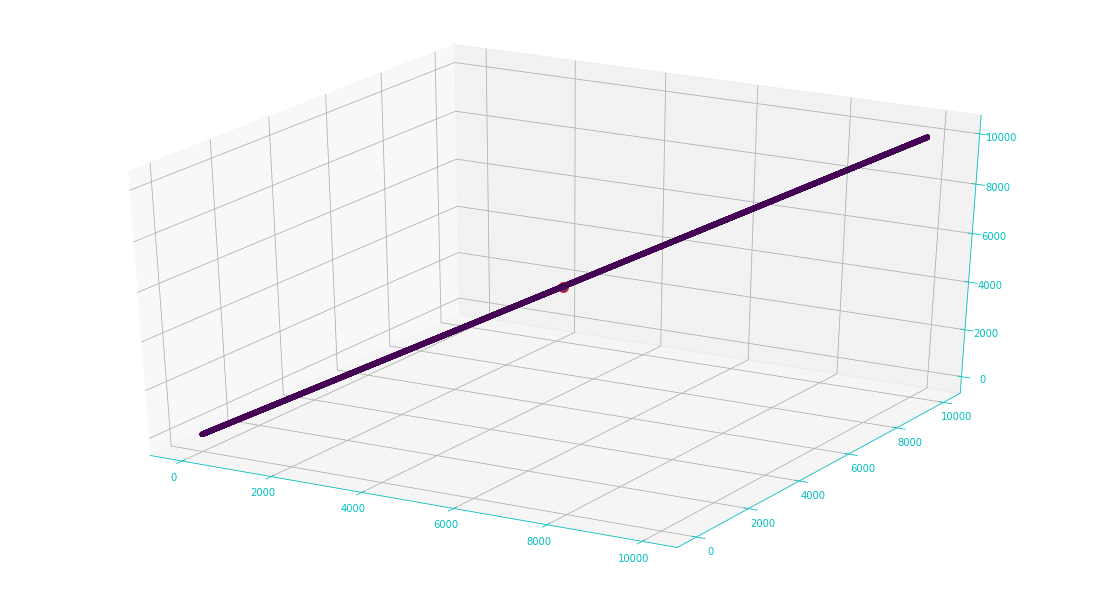

In [18]:
N, d, K = 10000, 100, 1000
p = np.ones(K) / K
q = 10#4
Mu = q * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)

X = generate(N, d, K, p, Mu, Sigma)
Kmeans3D(X,K)

In [19]:
import matplotlib.image as mpimg


In [20]:
def Kmeans4(data,k):   
    no_iter =40
    N=data.shape[0] #number of training examples
    M=data.shape[1] #number of features
    centroids = rand_centr(N,k,data)
    indexes = np.zeros(N, dtype=np.int)
    for i in range(no_iter):
        if not assignement(data, centroids, indexes):
            break
        #print(indexes)#przypisanie do centroidow
        update(k, M, indexes, data, centroids)
   # print("znalezione",centroids)
    v = [centroids, indexes]
    return v
    #plot1(data, indexes, centroids)

Zadanie 4. (2 punkty)<br>
Zdjęcie fotograficzne o rozdzielczości A x B w formacie RGB można traktować jako zbiór N = A * B
trójwymiarowych punktów danych. Po przeprowadzeniu grupowania takich danych, z liczbą grup K,
można obniżyć liczbę kolorów zdjęcia do K (tworząc paletę K kolorów określonych przez środki
uzyskanych grup, a następnie zastępując kolor każdego piksela najbliższym mu kolorem ze
stworzonej palety). Napisz program wczytujący zdjęcie z pliku JPG (polecenie imread w Matlabie
lub w Pythonie), redukujący liczbę kolorów w powyższy sposób i wyświetlający zredukowane
zdjęcie na ekranie. Sprawdź działanie programu na 5 wybranych przez siebie zdjęciach.

In [21]:
from scipy import ndimage
from sklearn import cluster


760 970 3


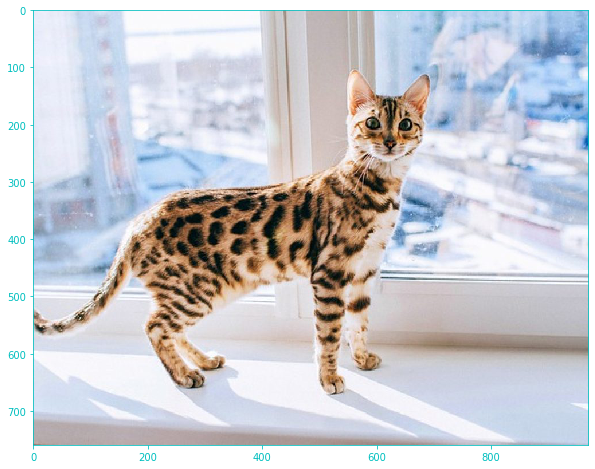

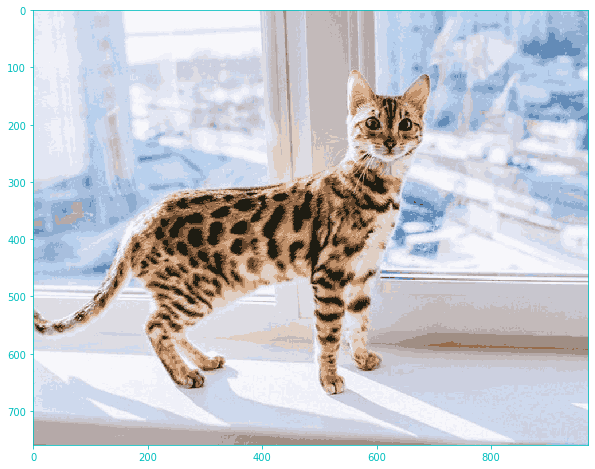

In [47]:
#%%timeit 9 s dla 8 kolorow
image = mpimg.imread("kot2.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

x, y, z = image.shape
print(x,y,z)
image_2d = image.reshape(x*y, z)/255 #porowynywanie na floatach
#print(image_2d)
vv = Kmeans4(image_2d, 20)
plt.figure(figsize = (15,8))
res = vv[0][vv[1]] #centroids(indexes), przypisanie do odpowiednich centroidow
plt.imshow(res.reshape(x,y,z))

387 620 3


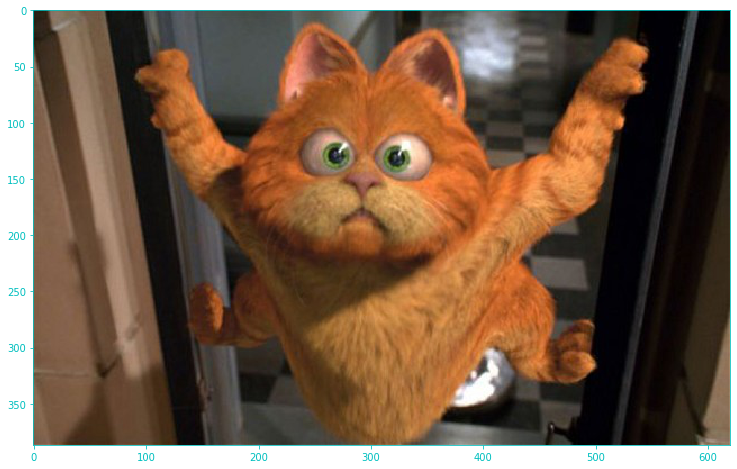

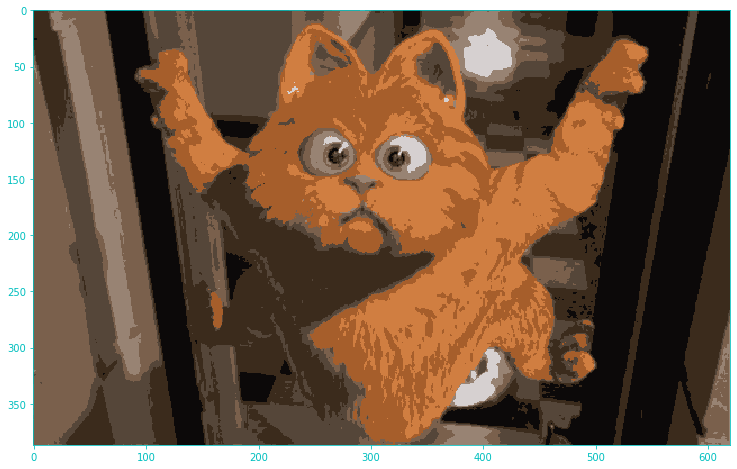

In [23]:
image = mpimg.imread("k1.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

x, y, z = image.shape
print(x,y,z)
image_2d = image.reshape(x*y, z)/255
#print(image_2d)
vv = Kmeans4(image_2d, 8)
plt.figure(figsize = (15,8))
res = vv[0][vv[1]] #centroids(indexes)
plt.imshow(res.reshape(x,y,z))

540 720 3


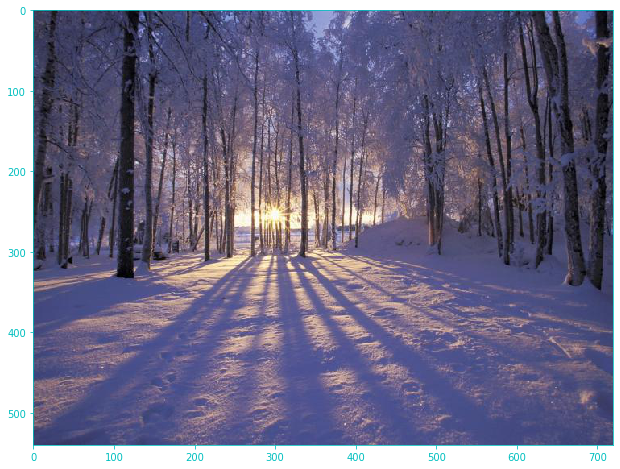

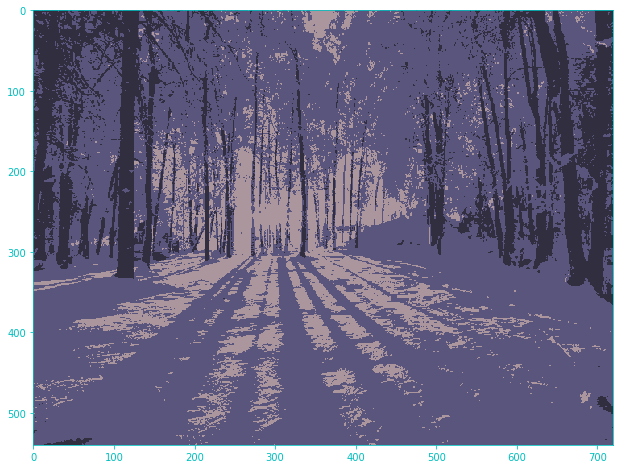

In [24]:
image = mpimg.imread("k2.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

x, y, z = image.shape
print(x,y,z)
image_2d = image.reshape(x*y, z)/255
#print(image_2d)
vv = Kmeans4(image_2d, 3)
plt.figure(figsize = (15,8))
res = vv[0][vv[1]] #centroids(indexes)
plt.imshow(res.reshape(x,y,z))

431 767 4


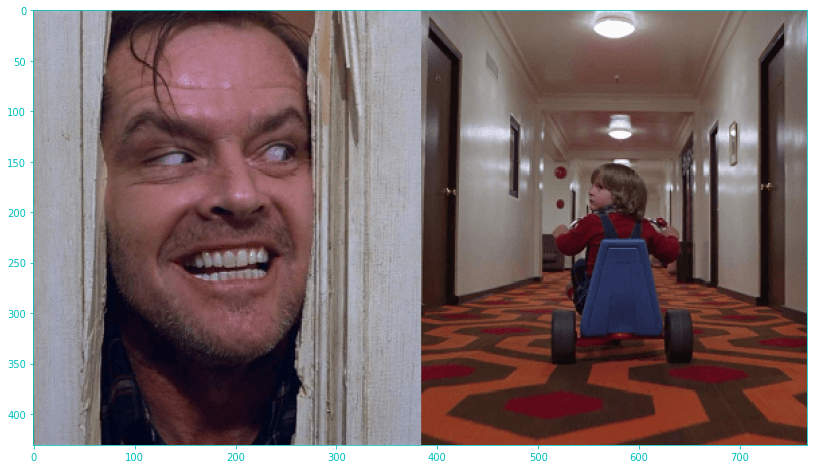

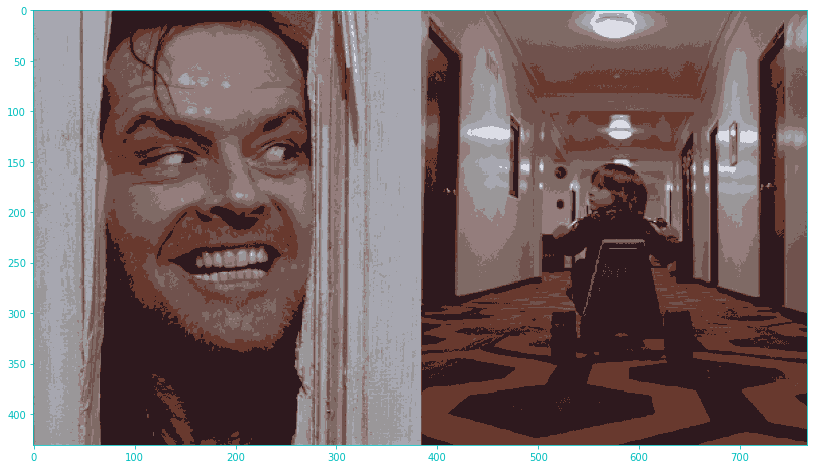

In [25]:
image = mpimg.imread("k3.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

x, y, z = image.shape
print(x,y,z)
image_2d = image.reshape(x*y, z)/255
#print(image_2d)
vv = Kmeans4(image_2d, 8)
plt.figure(figsize = (15,8))
res = vv[0][vv[1]] #centroids(indexes)
plt.imshow(res.reshape(x,y,z))

780 1300 3


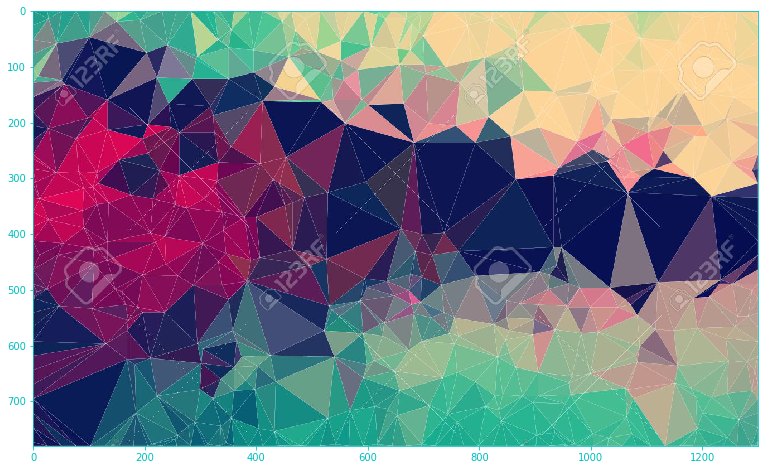

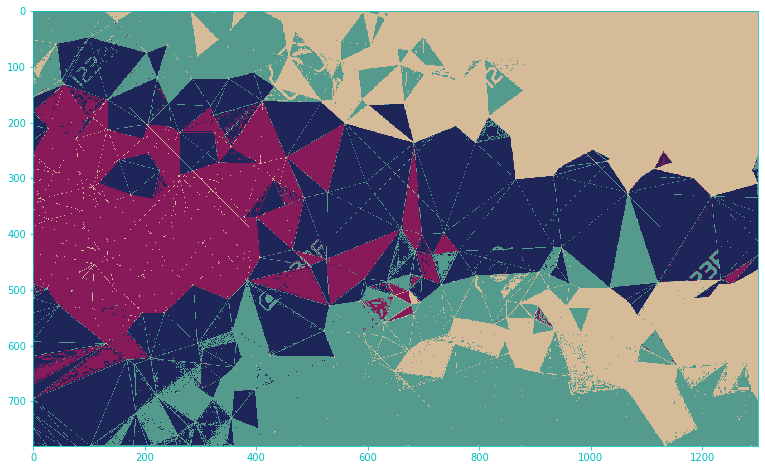

In [26]:
image = mpimg.imread("k4.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

x, y, z = image.shape
print(x,y,z)
image_2d = image.reshape(x*y, z)/255
#print(image_2d)
vv = Kmeans4(image_2d, 4)
plt.figure(figsize = (15,8))
res = vv[0][vv[1]] #centroids(indexes)
plt.imshow(res.reshape(x,y,z))

In [42]:
kos = np.fromfile('kosarak.dat', dtype=int)
np.sum(kos)#trzeba inaczej

-1619787672588737524